In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
from matplotlib.legend import Legend
%matplotlib inline

from hyppo.sims import gaussian_2samp_2level
from hyppo.independence import MGC, Dcorr

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])
np.set_printoptions(precision=3)

In [10]:
MAX_EPSILON1 = 1
MAX_EPSILON2 = 1
STEP_SIZE = 0.1#0.05
EPSILONS1 = np.arange(0, MAX_EPSILON1 + STEP_SIZE, STEP_SIZE)
EPSILONS2 = np.arange(0, MAX_EPSILON2 + STEP_SIZE, STEP_SIZE)
WEIGHTS = EPSILONS1
POWER_REPS = 2#5
REPS = 200

tests = [
    Dcorr,
]

multiways = [
    True,
    False,
]

FONTSIZE = 12

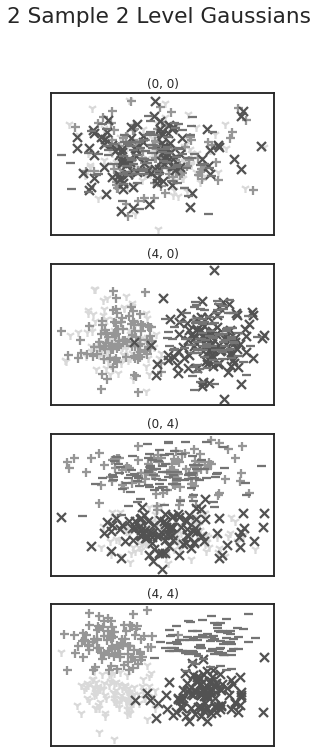

In [31]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(4,12))
    
sim_title = [
    "2 Sample 2 Level Gaussians",
]

epsilons = [
    (0,0),
    (4,0), # 1st level separate
    (0,4), # 2nd level separate
    (4,4), # Both separate
]

ax = np.array([ax]).reshape((4,-1))
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        ep1, ep2 = epsilons[i]
        sims = gaussian_2samp_2level(100, epsilon1=ep1, epsilon2=ep2)

        sim_markers = [
            "1",
            "+",
            "x",
            '_',
        ]
        custom_color = [
            "#d9d9d9",
            "#969696",
            "#525252",
            "#747474",
        ]

        count = 0
        scatters = []
        for sim in sims:
            x, y = np.hsplit(sim, 2)
            scatters.append(col.scatter(x, y, marker=sim_markers[count], color=custom_color[count]))

            #col.set_xlim(-5, 5)
            #if case not in [2, 4]:
            #    col.set_ylim(-5, 5)
            col.set_xticks([])
            col.set_yticks([])
            col.set_title(epsilons[i], fontsize=FONTSIZE)
            count += 1
            
plt.suptitle(sim_title[0])
plt.show()

<IPython.core.display.Javascript object>


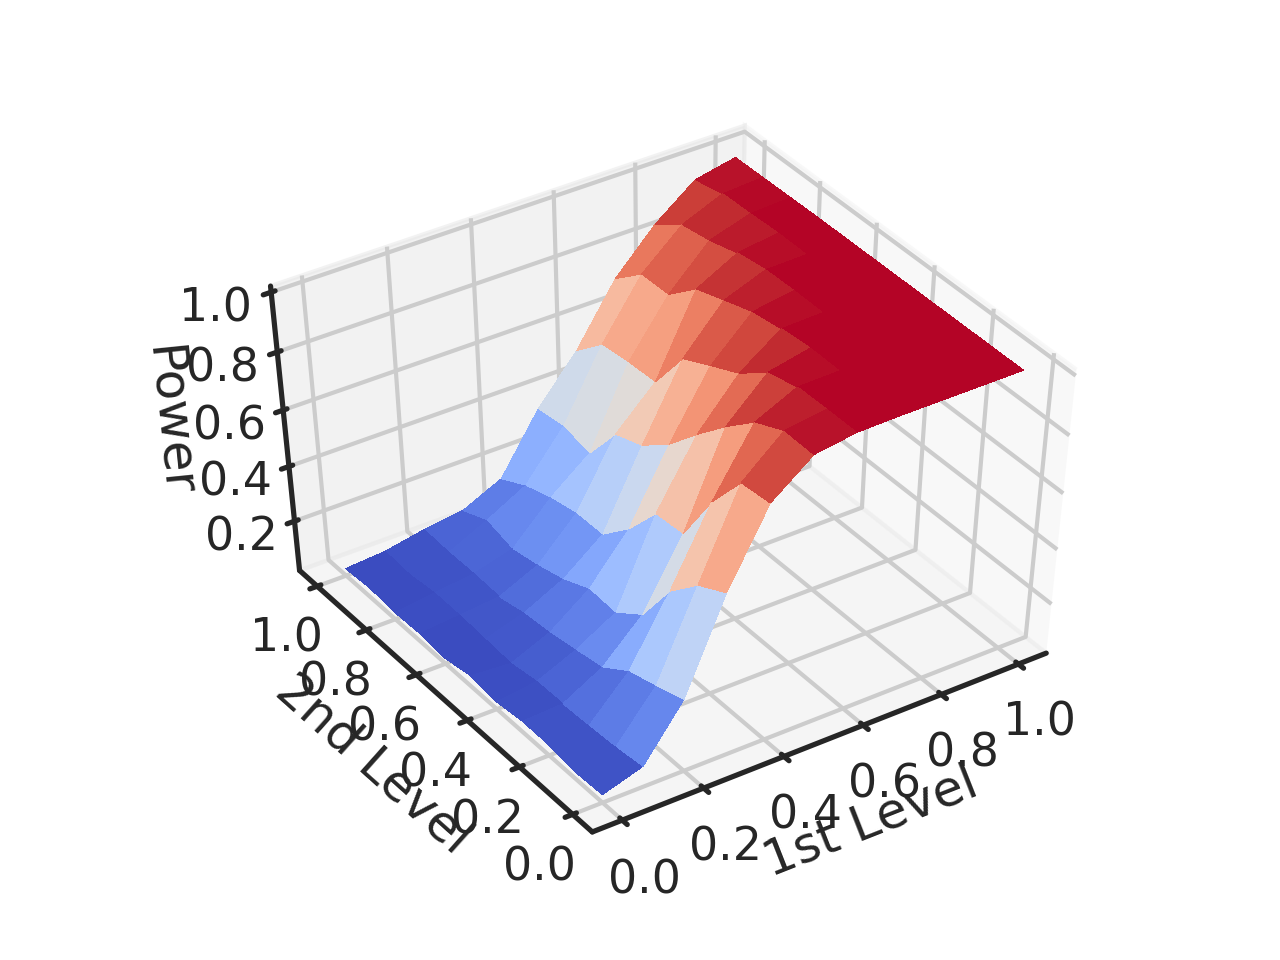

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for test in tests:
    for multiway in multiways:
        power = np.genfromtxt(
            '../benchmarks/2samp_2level_vs_epsilon/{}_{}.csv'.format(multiway, test.__name__),
            delimiter=','
        )

        custom_color = {
            "Dcorr" : "#377eb8",
            "Hsic" : "#4daf4a",
            "MGC" : "#e41a1c",
        }
        if multiway:
                label = f'Multiway {test.__name__}'
        else:
            label = f'{test.__name__}'
            
        X, Y = np.meshgrid(EPSILONS1, EPSILONS2)
        
        surf = ax.plot_surface(X, Y, power, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
        
        ax.set_xlabel('1st Level') # Epsilon 1 / Highest level / 
        ax.set_ylabel('2nd Level') # Epsilon 2
        ax.set_zlabel('Power')

plt.show()

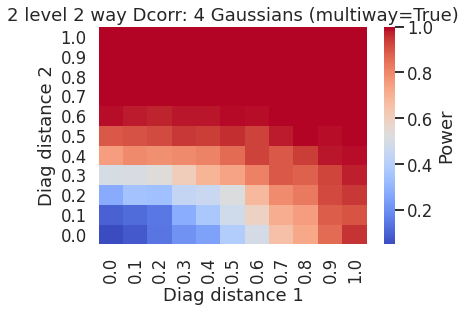

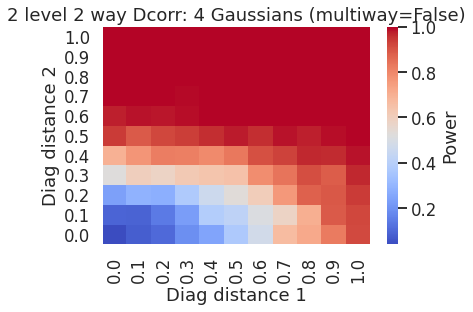

In [12]:
for test in tests:
    for multiway in multiways:
        power = np.genfromtxt(
            '../benchmarks/2samp_2level_vs_epsilon/{}_{}.csv'.format(multiway, test.__name__),
            delimiter=','
        )
        ax = sns.heatmap(
            power,
            cmap=cm.coolwarm,
            xticklabels=np.round(EPSILONS1 ,2),
            yticklabels=np.round(EPSILONS2 ,2),
            cbar_kws={'label': 'Power'}
        )
        ax.invert_yaxis()
        plt.xlabel('Diag distance 1') # Epsilon 1
        plt.ylabel('Diag distance 2') # Epsilon 2
        
        plt.title(f'2 level 2 way {test.__name__}: 4 Gaussians (multiway={multiway})')
        plt.show()